# Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu Mushroom

###### https://www.kaggle.com/datasets/uciml/mushroom-classification/data

#### Bước 1: Import thư viện, nạp dữ liệu vào notebook và đọc dữ liệu

In [164]:
# Import thư viện và nạp dữ liệu vào note book
# Xử lý dữ liệu
import pandas as pd
import numpy as np

# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Mô hình Naïve Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
# Đánh giá mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Thống kê mô tả (tùy chọn)
import scipy.stats as stats


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

In [150]:
data = pd.read_csv("mushrooms.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Xem 10 dòng đầu
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [152]:
# Kiểm tra kích thước và thông tin dữ liệu
print(data.shape)
print(data.info())

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

#### Bước 2: Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [142]:
# Kiểm tra các lỗi trung lặp và điều chỉnh (nếu có)
duplicates = data.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicates}")

Số dòng bị trùng lặp: 0


In [143]:
# Kiểm tra kiểu dữ liệu, lỗi định dạng
print("\nKiểm tra các kiểu dữ liệu:")
print(data.dtypes)


Kiểm tra các kiểu dữ liệu:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [153]:
# Mã hóa biến phân loại sang số
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

print("\nSau khi mã hóa:")
df.head()


Sau khi mã hóa:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [156]:
# Kiểm tra và xử lí giá trị bị thiếu (Missing Value)
print("Số lượng giá trị thiếu trong từng cột:")

# print(data.isnull().sum()) -- Lệnh này vẫn dùng được
df.isnull().sum().to_frame('NaN value').T

Số lượng giá trị thiếu trong từng cột:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
NaN value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Bước 3: Thống kê mô tả bằng NumPy, Pandas và Scipy

In [161]:
# Sử dụng Pandas
print("Thống kê mô tả (Pandas):")
display(df.describe())

# Sử dụng NumPy
print("\nGiá trị trung bình từng biến (NumPy):")
print(np.mean(df, axis=0))

# Sử dụng SciPy - Kiểm định phân phối chuẩn cho 1 biến ví dụ

print("\nKiểm định (SciPy)")
col_test = 'cap-shape'
stat, p = stats.normaltest(df[col_test])
print(f"\nKiểm định phân phối chuẩn cho {col_test}: stat={stat:.3f}, p-value={p:.3f}")
if p > 0.05:
    print("Không bác bỏ H0 → Có thể phân phối chuẩn.")
else:
    print("Bác bỏ H0 → Không phân phối chuẩn.")

Thống kê mô tả (Pandas):


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.0,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000
mean,0.482,3.348,1.828,4.505,0.416,4.145,0.974,0.161,0.309,4.811,0.567,1.110,1.575,1.604,5.816,5.795,0.0,1.966,1.069,2.292,3.597,3.644,1.509
std,0.500,1.604,1.230,2.546,0.493,2.104,0.159,0.368,0.462,3.540,0.495,1.061,0.621,0.676,1.902,1.907,0.0,0.243,0.271,1.802,2.383,1.252,1.720
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,2.000,0.000,3.000,0.000,2.000,1.000,0.000,0.000,2.000,0.000,0.000,1.000,1.000,6.000,6.000,0.0,2.000,1.000,0.000,2.000,3.000,0.000
50%,0.000,3.000,2.000,4.000,0.000,5.000,1.000,0.000,0.000,5.000,1.000,1.000,2.000,2.000,7.000,7.000,0.0,2.000,1.000,2.000,3.000,4.000,1.000
75%,1.000,5.000,3.000,8.000,1.000,5.000,1.000,0.000,1.000,7.000,1.000,1.000,2.000,2.000,7.000,7.000,0.0,2.000,1.000,4.000,7.000,4.000,2.000
max,1.000,5.000,3.000,9.000,1.000,8.000,1.000,1.000,1.000,11.000,1.000,4.000,3.000,3.000,8.000,8.000,0.0,3.000,2.000,4.000,8.000,5.000,6.000



Giá trị trung bình từng biến (NumPy):
class                       0.482
cap-shape                   3.348
cap-surface                 1.828
cap-color                   4.505
bruises                     0.416
odor                        4.145
gill-attachment             0.974
gill-spacing                0.161
gill-size                   0.309
gill-color                  4.811
stalk-shape                 0.567
stalk-root                  1.110
stalk-surface-above-ring    1.575
stalk-surface-below-ring    1.604
stalk-color-above-ring      5.816
stalk-color-below-ring      5.795
veil-type                   0.000
veil-color                  1.966
ring-number                 1.069
ring-type                   2.292
spore-print-color           3.597
population                  3.644
habitat                     1.509
dtype: float64

Kiểm định (SciPy)

Kiểm định phân phối chuẩn cho cap-shape: stat=10999.650, p-value=0.000
Bác bỏ H0 → Không phân phối chuẩn.


#### Bước 4: Xây dựng mô hình Naïve Bayes

In [183]:
# Chia dữ liệu thành X (độc lập) và y (phụ thuộc)
X = df.drop("class", axis=1)
y = df["class"]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tập train:", X_train.shape)
print("Tập test:", X_test.shape)

Tập train: (5686, 22)
Tập test: (2438, 22)


In [181]:
# Xây dựng mô hình Naïve Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

#### Bước 5: Đánh giá hiệu quả của mô hình

In [169]:
# Đánh giá mô hình
acc = accuracy_score(y_test, y_pred)
print("Độ chính xác (Accuracy):", round(acc, 4))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác (Accuracy): 0.9459

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1257
           1       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



#### Bước 6: Trực quan hóa

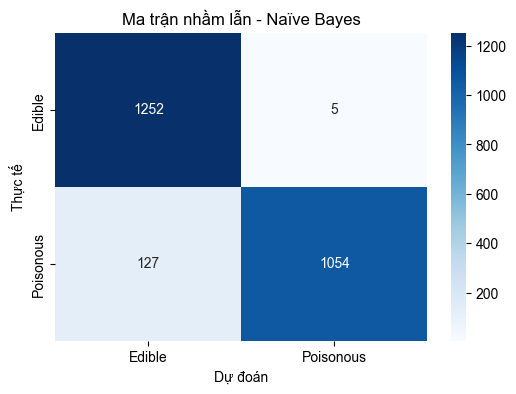

In [172]:
# Ma trận nhầm lẫn trực quan
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - Naïve Bayes")
plt.show()

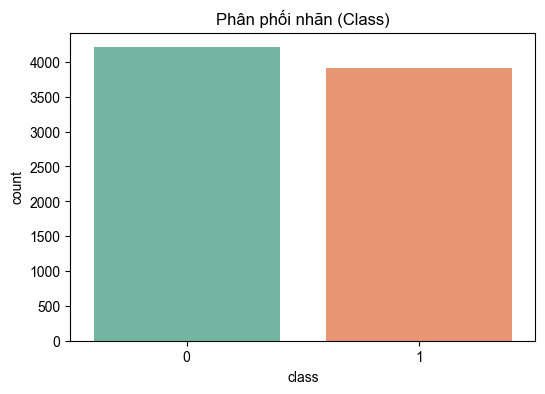

In [177]:
# Trực quan hóa phân phối của biến mục tiêu
plt.figure(figsize=(6,4))
sns.countplot(x='class', hue='class', data=df, palette='Set2', legend=False)
plt.title("Phân phối nhãn (Class)")
plt.show()

#### Bước 6: Kết luận

Kết quả mô hình Random Forest cho thấy độ chính xác tổng thể đạt 94,59%, chứng tỏ mô hình hoạt động hiệu quả trong việc phân loại nấm ăn được và nấm độc. Cụ thể, mô hình đạt độ chính xác (precision) 91% đối với lớp nấm ăn được và 100% đối với lớp nấm độc, cho thấy khả năng dự đoán chính xác cao, đặc biệt là trong việc hạn chế nhầm lẫn nấm độc thành nấm ăn được - một yếu tố quan trọng trong ứng dụng thực tế. Độ bao phủ (recall) đạt 100% với nấm ăn được và 89% với nấm độc, đồng thời F1-score trung bình đạt khoảng 0,95, phản ánh sự cân bằng tốt giữa độ chính xác và khả năng nhận diện. Nhìn chung, mô hình có thể được xem là đáng tin cậy trong việc hỗ trợ nhận diện nấm độc, tuy nhiên vẫn có thể cải thiện thêm bằng cách tăng trọng số cho lớp nấm độc hoặc mở rộng dữ liệu huấn luyện nhằm nâng cao khả năng bao phủ của mô hình.